# Programming Assignment #2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
# PLot CT
def plot_ct_signal(t, x_t):
    fig = plt.figure(figsize=(14.5, 7))
    plt.plot(t, x_t)
    plt.show()

# PLot DT
def plot_dt_signal(n, x_n):
    fig = plt.figure(figsize=(14.5, 7))
    plt.stem(n, x_n)
    plt.show()

# Perform a circular convolution
def circular_convolution(x_n, h_n):
    
    # Add padding
    x_n = x_n + [0] * (len(h_n) - 1)
    h_n = h_n + [0] * (len(h_n) - 1)
    
    y, g = [], x_n[::-1]

    for i in range(0, len(x_n)):
        g = g[-1:] + g[:-1]
        y.append(sum([a * b for a, b in zip(g, h_n)]))
        
    return y

def convolve(x_n, h_n):
    
    x_n = list(x_n)
    h_n = list(h_n)
    _max = np.max([len(x_n), len(h_n)])
    
    # Calculate convolution
    y = circular_convolution(x_n, h_n)
    
    _s = (len(y) - _max) // 2
    
    # Return the numpy form
    return np.array(y[_s:_s + _max])

# 1

## a

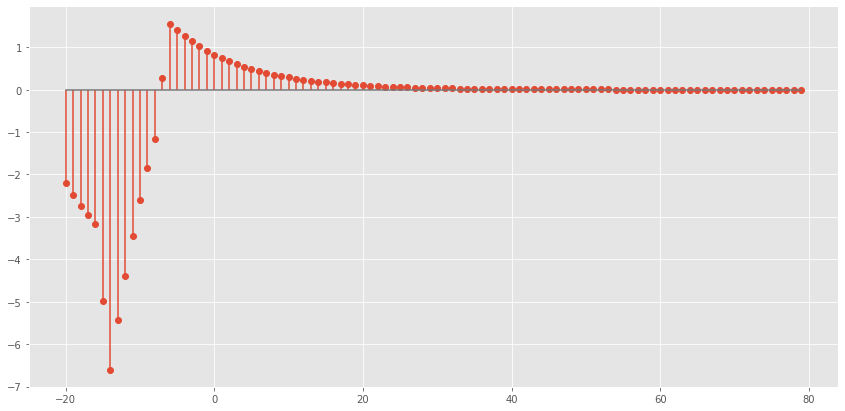

In [8]:
n = np.arange(-20, 80, step = 1)
x_n = np.heaviside(n + 2, 1) - 2 * np.heaviside(n - 12, 1) + np.heaviside(n - 20, 1)
h_n = np.power(0.9, n) * (np.heaviside(n - 2, 1) - 2 * np.heaviside(n - 4, 1))

# Convolve
plot_dt_signal(n, convolve(x_n, h_n))

# Check with numpy
# plot_dt_signal(n, np.convolve(x_n, h_n, mode = 'same'))

## b

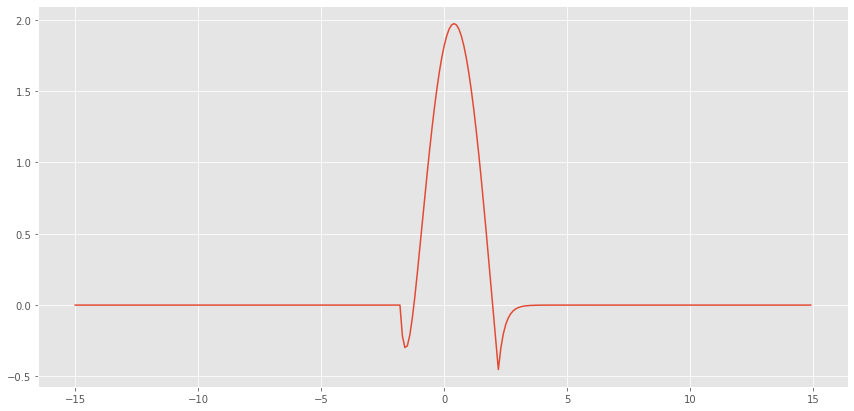

In [4]:
t = np.arange(-15, 15, step = 0.1)
x_t = np.cos(t) * (np.heaviside(t + 2, 0) - np.heaviside(t - 2, 0))
h_t = np.exp(-4 * t) * np.heaviside(t, 0)

# Convolve
plot_ct_signal(t, convolve(x_t, h_t))

# Check with numpy
# plot_ct_signal(t, np.convolve(x_t, h_t, mode = 'same'))

## c

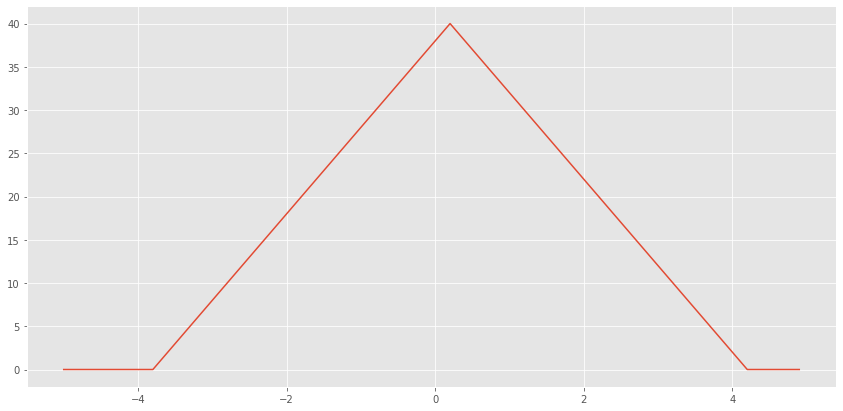

In [5]:
def x_t(t, a):
    if abs(t) < a:
        return 1
    else:
        return 0

t = np.arange(-5, 5, step = 0.1)

# Vectorize and map
x1_t = np.vectorize(x_t, otypes = [float])(t, 1)
x2_t = np.vectorize(x_t, otypes = [float])(t, 3)
x_t = x1_t + x2_t

h_t = np.vectorize(lambda t: 1 if (abs(t) < 1) else 0, otypes = [float])(t)

# Convolve
plot_ct_signal(t, convolve(x_t, h_t))

# Check with numpy
# plot_ct_signal(t, np.convolve(x_t, h_t, mode = 'same'))

# 2

## a

In [6]:
t = np.arange(-20, 20, step = 0.1)
x_t = 1.5 * np.sin(10 * t) + (t * np.sin(1.5 * t) + np.cos(7.5 * t))

def h_t(t, a):
    return np.heaviside(t + a, 0) - np.heaviside(t - a, 0)

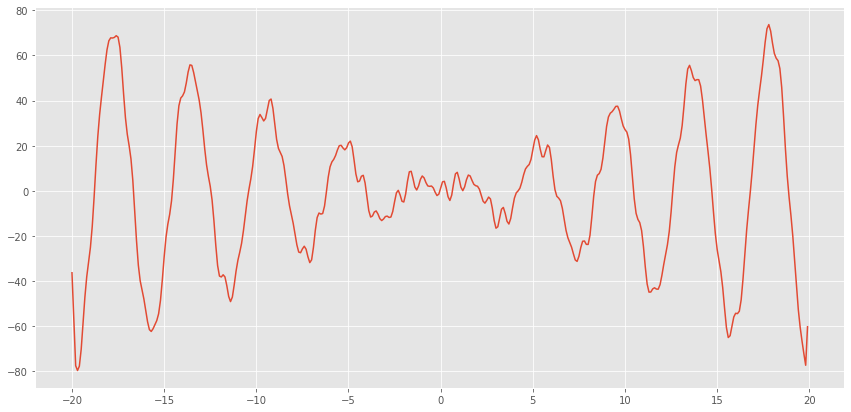

In [7]:
# Convolve
plot_ct_signal(t, convolve(x_t, h_t(t, 0.2)))

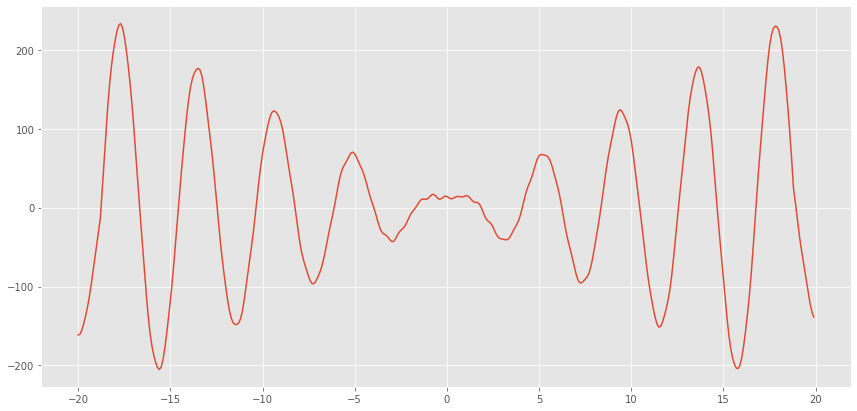

In [8]:
# Convolve
plot_ct_signal(t, convolve(x_t, h_t(t, 1.2)))

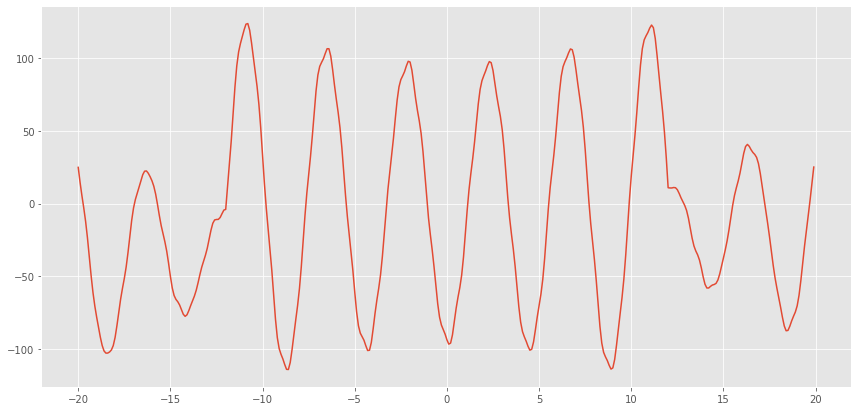

In [9]:
# Convolve
plot_ct_signal(t, convolve(x_t, h_t(t, 8)))

## b

The parameter **a**, controls the noise. There more it is, the less the noise will be. It smooths the signal.